In [1]:
%matplotlib inline

In [2]:
import re
from collections import OrderedDict
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [3]:
def load_data(name):
    with open(name) as sr:
        lines =  [line for line in sr.read().split('\n') if 'finished epoch' in line]
        return pd.DataFrame(OrderedDict([
            ('loss', [float(re.search(r'loss: ([\d.]+)', line).group(1)) for line in lines]),
            ('val acc', [float(re.search(r'val acc: ([\d.]+)', line).group(1)) for line in lines]),
            ('test acc', [float(re.search(r'test acc: ([\d.]+)', line).group(1)) for line in lines]),
        ]))

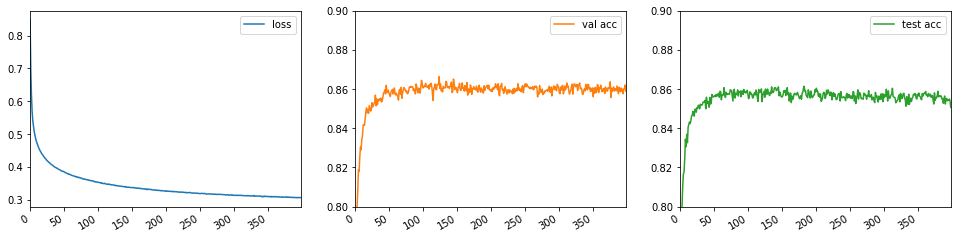

In [4]:
# best with mean, normalization, projection
load_data('results/run_04.txt').plot(subplots=True, figsize=(16.5, 4.0), layout=(1, 3))
[plt.gcf().get_axes()[i].set_ylim(0.8, 0.9) for i in (1, 2)]; None

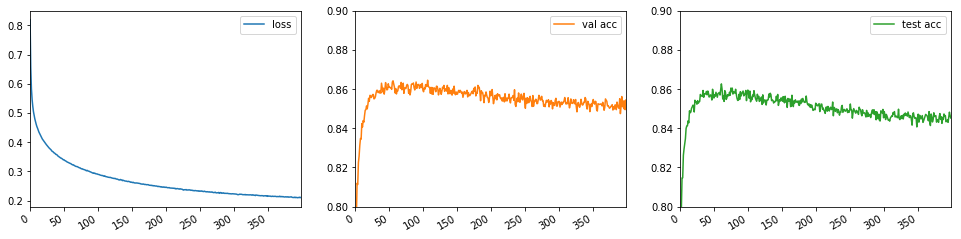

In [5]:
# intra-sentence is overfit
load_data('results/run_06.txt').plot(subplots=True, figsize=(16.5, 4.0), layout=(1, 3))
[plt.gcf().get_axes()[i].set_ylim(0.8, 0.9) for i in (1, 2)]; None

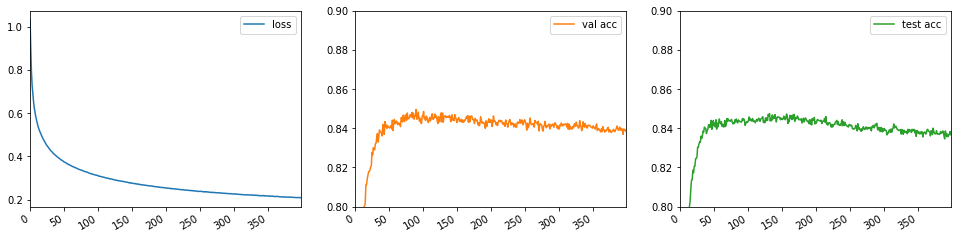

In [6]:
# we get worse results and still have overfitting using the paper's optimization settings
load_data('results/run_09.txt').plot(subplots=True, figsize=(16.5, 4.0), layout=(1, 3))
[plt.gcf().get_axes()[i].set_ylim(0.8, 0.9) for i in (1, 2)]; None

In [7]:
data = load_data('results/run_11.txt')
print(data.iloc[-1])
print(data.iloc[data['val acc'].argmax()])

loss        0.201707
val acc     0.844442
test acc    0.841816
Name: 399, dtype: float64
loss        0.320541
val acc     0.860496
test acc    0.856169
Name: 42, dtype: float64


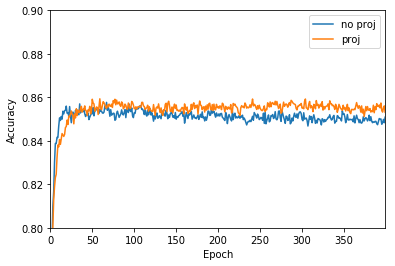

In [8]:
ax = load_data('results/run_02.txt')['test acc'].plot()
ax = load_data('results/run_03.txt')['test acc'].plot()
ax.legend(['no proj', 'proj'])
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_ylim(0.8, 0.9)
ax.get_figure().savefig('../papers/decomp_attend_report/fig/test_no_proj_vs_proj.pdf')

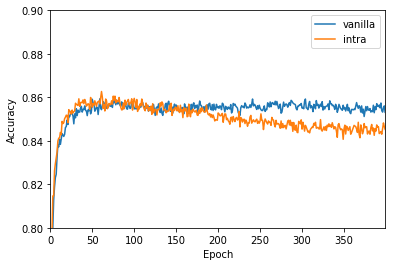

In [9]:
ax = load_data('results/run_03.txt')['test acc'].plot()
ax = load_data('results/run_06.txt')['test acc'].plot()
ax.legend(['vanilla', 'intra'])
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_ylim(0.8, 0.9)
ax.get_figure().savefig('../papers/decomp_attend_report/fig/test_vanilla_vs_intra.pdf')